In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TakeHaha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("Email.xls",encoding = 'latin') # why 

In [4]:
df

,Unnamed: 0,Message,Category
0,0,Subject: naturally irresistible your corporate...,1
1,1,Subject: the stock trading gunslinger fanny i...,1
2,2,Subject: unbelievable new homes made easy im ...,1
3,3,Subject: 4 color printing special request add...,1
4,4,"Subject: do not have money , get software cds ...",1
...,...,...,...
11135,11135,This is the 2nd time we have tried 2 contact u...,1.0
11136,11136,Will Â¨Â¹ b going to esplanade fr home?,0.0
11137,11137,"Pity, * was in mood for that. So...any other s...",0.0
11138,11138,The guy did some bitching but I acted like i'd...,0.0


In [5]:
df = df[["Message","Category"]]

In [6]:
#df.columns = ['Category', 'Message']

In [7]:
category_counts = df['Category'].value_counts()
category_counts  

Category
0.0               4820
0                 4195
1                 1368
1.0                747
IÂL CALL U"""       1
Name: count, dtype: int64

In [8]:
df.loc[:, 'Category'] = df['Category'].replace({"0.0": 0, "1.0": 1})
df.loc[:, 'Category'] = df['Category'].replace({"0": 0, "1": 1})

In [9]:
df = df[df['Category'].isin([0, 1])]

In [10]:
category_counts = df['Category'].value_counts()
category_counts  

Category
0    9015
1    2115
Name: count, dtype: int64

In [11]:
df

,Message,Category
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
11135,This is the 2nd time we have tried 2 contact u...,1
11136,Will Â¨Â¹ b going to esplanade fr home?,0
11137,"Pity, * was in mood for that. So...any other s...",0
11138,The guy did some bitching but I acted like i'd...,0


In [12]:
df.isnull().sum()

Message     0
Category    0
dtype: int64

In [13]:
df.shape

(11130, 2)

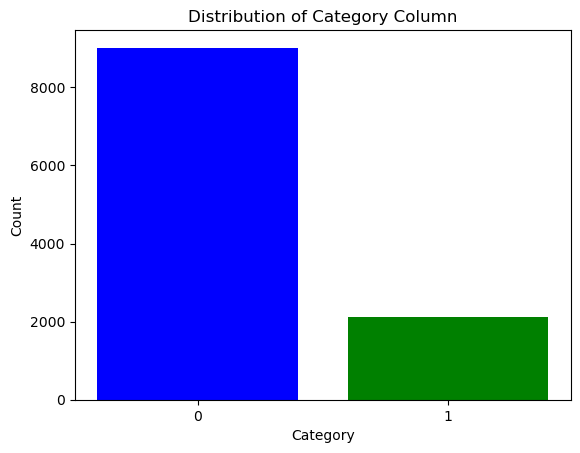

In [14]:
plt.bar(category_counts.index, category_counts.values, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1])  
plt.title('Distribution of Category Column')

plt.show()

In [15]:
def process(text):
    sentence = [char for char in text if char not in string.punctuation]
    sentence = ''.join(sentence)
    clean = [word for word in sentence.split() if word.lower() not in stopwords.words('english')]
    return clean

In [16]:
df["Message"][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [17]:
process(df["Message"][0])

['Subject',
 'naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'really',
 'hard',
 'recollect',
 'company',
 'market',
 'full',
 'suqgestions',
 'information',
 'isoverwhelminq',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'make',
 'task',
 'much',
 'easier',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'become',
 'world',
 'ieader',
 'isguite',
 'ciear',
 'without',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 'promise',
 'marketing',
 'efforts',
 'become',
 'much',
 'effective',
 'list',
 'clear',
 'benefits',
 'creativeness',
 'hand',
 'made',
 'original',
 'logos',
 'specially',
 'done',
 'reflect',
 'distinctive',
 'company',
 'image',
 'convenience',
 'logo',
 'stationery',
 'provided',
 'formats',
 'easy',
 'use',
 'content',
 'management',
 'system',
 'letsyou',
 'change',
 'website',
 'content',
 'even',
 'structu

In [29]:
#message = CountVectorizer(analyzer=process,max_features=100).fit(df['Message'])
#model_name = "vectorizer.pkl"
#joblib.dump(message,model_name)

['vectorizer.pkl']

In [19]:
X = df["Message"]
y = df["Category"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [21]:
vectorizer = CountVectorizer(analyzer=process)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [22]:

# Train Naive Bayes model
classifier = MultinomialNB(alpha=0.1).fit(X_train_transformed, y_train)

pred_test = classifier.predict(X_test_transformed)
print(classification_report(y_test, pred_test))
print("Accuracy on test data:", accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1783
           1       0.83      0.95      0.89       443

    accuracy                           0.95      2226
   macro avg       0.91      0.95      0.93      2226
weighted avg       0.96      0.95      0.95      2226

Accuracy on test data: 0.9532794249775381


In [23]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)
best_svm_model = grid_search.best_estimator_

In [24]:
svm_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1783
           1       0.98      0.90      0.94       443

    accuracy                           0.98      2226
   macro avg       0.98      0.95      0.96      2226
weighted avg       0.98      0.98      0.98      2226



In [25]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 15],
    'min_samples_split': [2, 5,7]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_transformed, y_train)
best_rf_model = grid_search_rf.best_estimator_


In [26]:
rf_pred = best_rf_model.predict(X_test_transformed)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1783
           1       1.00      0.32      0.48       443

    accuracy                           0.86      2226
   macro avg       0.93      0.66      0.70      2226
weighted avg       0.88      0.86      0.83      2226



In [27]:
best_rf_model

RandomForestClassifier(max_depth=20, min_samples_split=7, n_estimators=200)

In [28]:
#model_name = "rf_model.pkl"
#joblib.dump(best_rf_model,model_name)